In [ ]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import sklearn
import plotly
import matplotlib.pyplot as plt
import seaborn as sns
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
reviews = pd.read_csv("Reviews.csv")

In [ ]:
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
reviews.shape

(38175, 10)

In [ ]:
reviews.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,38175.0000,38175.000000,38175.000000,38175.000000,3.817500e+04
mean,19088.0000,1.597511,2.050766,4.147033,1.294096e+09
std,11020.3176,5.820486,6.401462,1.327395,4.721721e+07
min,1.0000,0.000000,0.000000,1.000000,9.617184e+08
25%,9544.5000,0.000000,0.000000,4.000000,1.267661e+09
50%,19088.0000,0.000000,1.000000,5.000000,1.307146e+09
75%,28631.5000,1.000000,2.000000,5.000000,1.329869e+09
max,38175.0000,398.000000,401.000000,5.000000,1.351210e+09


In [ ]:
reviews.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               1
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   1
Text                      0
dtype: int64

In [ ]:
reviews["Helpfulness"] = reviews["HelpfulnessNumerator"]/reviews["HelpfulnessDenominator"] 
reviews['Helpfulness'].fillna(0).head()
reviews["Helpfulness"].mean()

0.7724542818282639

In [ ]:
reviews["Summary"].isnull().sum()

1

In [ ]:
reviews["Summary"] = reviews["Summary"].fillna('')

In [ ]:
reviews["Summary_length"] = reviews["Summary"].map(lambda x: len(x.split()))
reviews["Text_length"] = reviews["Text"].map(lambda x: len(x.split()))

In [ ]:
reviews["Time"].dtype

dtype('int64')

In [ ]:
reviews["Time"] = pd.to_datetime(reviews.Time,  unit='s')
reviews["Time"].dtype

dtype('<M8[ns]')

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

def score_sentiment(compound_score):
    if compound_score >= 0.05:
        return("Positive")
    elif compound_score < 0.05 and compound_score >= -0.05:
        return("Neutral")
    else:
        return("Negative")

In [ ]:
reviews["Text_sentiment"] = reviews["Text"].map(lambda x: score_sentiment(analyser.polarity_scores(x)['compound']))
reviews["Summary_sentiment"] = reviews["Summary"].map(lambda x: score_sentiment(analyser.polarity_scores(x)['compound']))

In [ ]:
reviews["Text_sentiment"].head()

0    Positive
1    Negative
2    Positive
3    Positive
4    Positive
Name: Text_sentiment, dtype: object

In [ ]:
reviews["Summary_sentiment"].head()

0    Positive
1     Neutral
2    Positive
3     Neutral
4    Positive
Name: Summary_sentiment, dtype: object

### Reviews Over Time (Time Feature)

In [ ]:
pd.DatetimeIndex(reviews['Time']).year.value_counts()

2012    12091
2011    11333
2010     6096
2009     4358
2008     2338
2007     1403
2006      407
2005       99
2004       43
2003        5
2000        2
Name: Time, dtype: int64

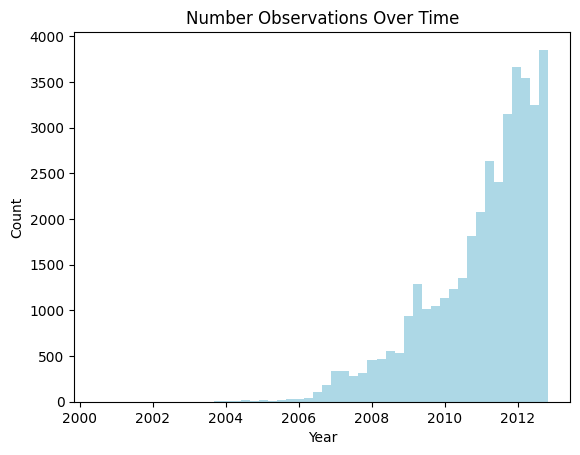

In [ ]:
plt.hist(reviews["Time"], bins=50, color='lightblue')
plt.ylabel('Count')
plt.xlabel('Year')
plt.title('Number Observations Over Time')
plt.show()

In [ ]:
pd.DatetimeIndex(reviews['Time']).year == '2000'

array([False, False, False, ..., False, False, False])

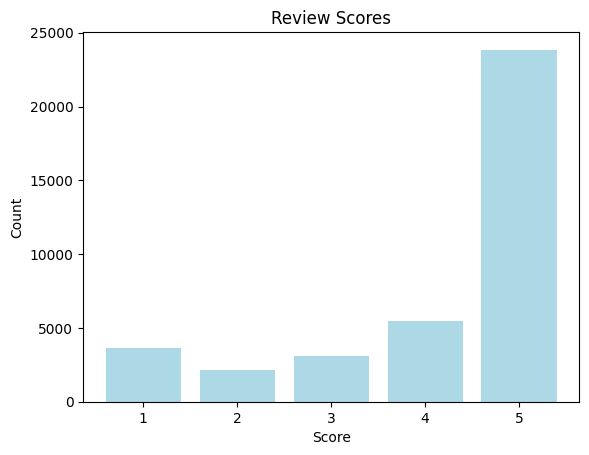

In [ ]:
score_counts = reviews["Score"].value_counts().to_dict()
plt.bar(score_counts.keys(),height=score_counts.values(),color='lightblue')
plt.ylabel('Count')
plt.xlabel('Score')
plt.title('Review Scores')
plt.show()

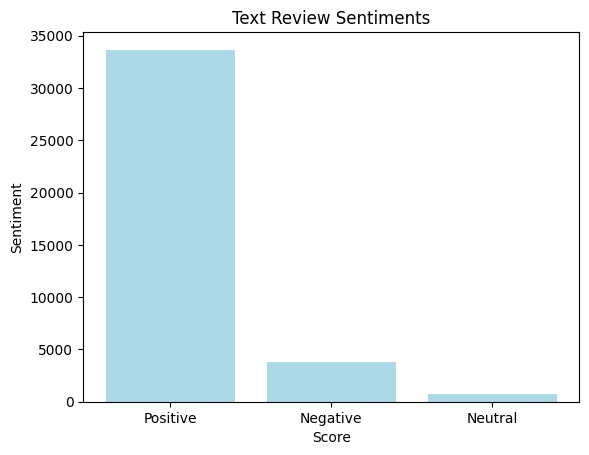

In [ ]:
text_sentiment_counts = reviews["Text_sentiment"].value_counts().to_dict()
plt.bar(text_sentiment_counts.keys(),height=text_sentiment_counts.values(),color='lightblue')
plt.ylabel('Sentiment')
plt.xlabel('Score')
plt.title('Text Review Sentiments')
plt.show()

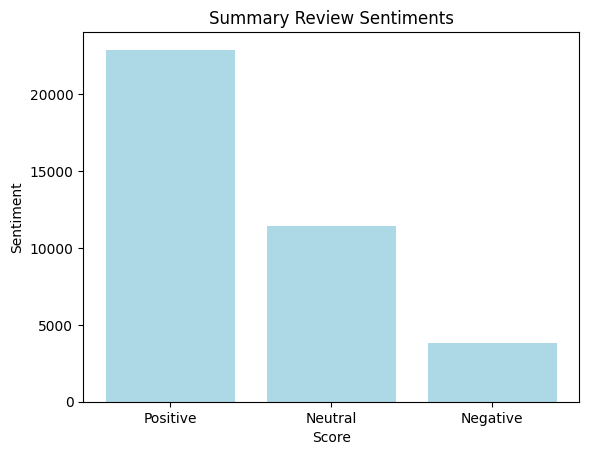

In [ ]:
summary_sentiment_counts = reviews["Summary_sentiment"].value_counts().to_dict()
plt.bar(summary_sentiment_counts.keys(),height=summary_sentiment_counts.values(),color='lightblue')
plt.ylabel('Sentiment')
plt.xlabel('Score')
plt.title('Summary Review Sentiments')
plt.show()

In [ ]:
reviews_sentiment_count = reviews.groupby(['Score','Text_sentiment','Summary_sentiment']).count()[["Id"]].reset_index().rename(columns = {"Id": "Count"})
reviews_sentiment_count.head()

,Score,Text_sentiment,Summary_sentiment,Count
0,1,Negative,Negative,809
1,1,Negative,Neutral,636
2,1,Negative,Positive,167
3,1,Neutral,Negative,48
4,1,Neutral,Neutral,105


In [ ]:
melted_reviews = pd.melt(reviews_sentiment_count,id_vars=['Score','Text_sentiment','Summary_sentiment'],value_vars=['Count'])
melted_reviews.head()

,Score,Text_sentiment,Summary_sentiment,variable,value
0,1,Negative,Negative,Count,809
1,1,Negative,Neutral,Count,636
2,1,Negative,Positive,Count,167
3,1,Neutral,Negative,Count,48
4,1,Neutral,Neutral,Count,105


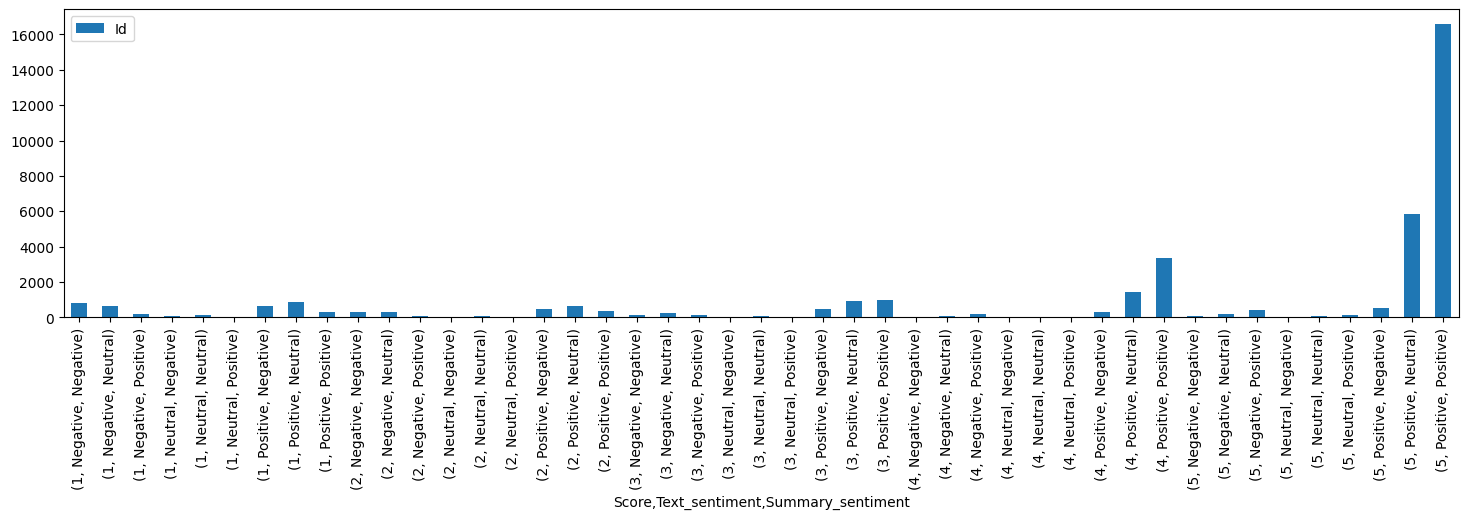

In [ ]:
reviews.groupby(['Score','Text_sentiment','Summary_sentiment']).count()[["Id"]].plot.bar(figsize=(18,4))
plt.show()

In [ ]:
from scipy.stats import spearmanr

spearmanr(reviews["Text_sentiment"], reviews["Summary_sentiment"])

SignificanceResult(statistic=0.27625298698622713, pvalue=0.0)

In [ ]:
spearmanr(reviews["Text_sentiment"], reviews["Score"])

SignificanceResult(statistic=0.39168570976655254, pvalue=0.0)

In [ ]:
spearmanr(reviews["Summary_sentiment"], reviews["Score"])

SignificanceResult(statistic=0.4225588863936174, pvalue=0.0)

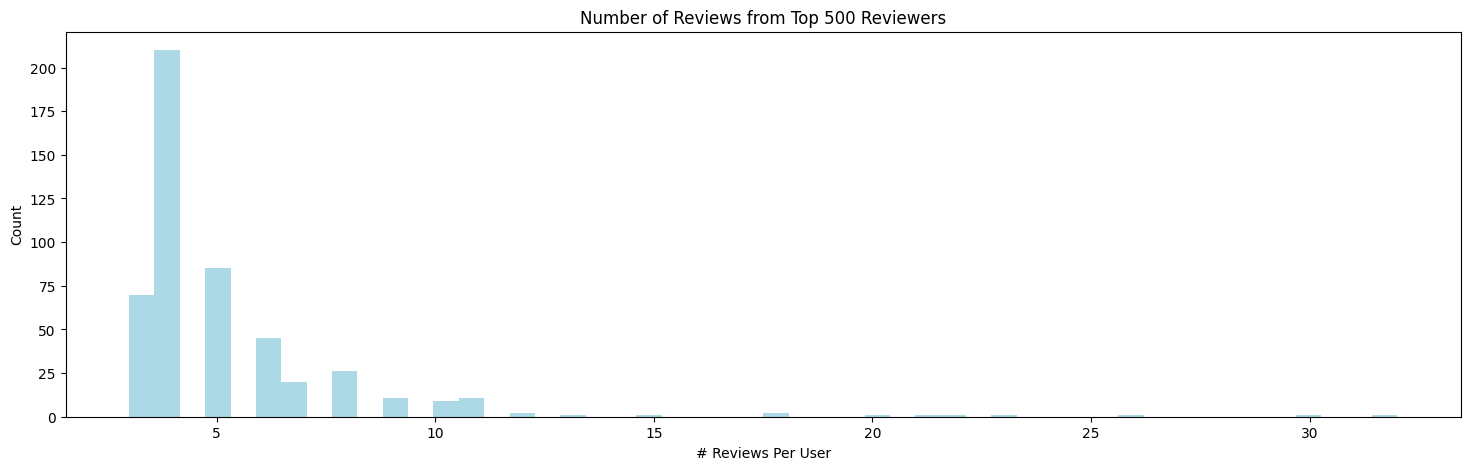

In [ ]:
top_500_reviewers_count = reviews["UserId"].value_counts().nlargest(500)

plt.figure(figsize=(18,5))
plt.hist(top_500_reviewers_count,bins=50,color='lightblue')
plt.ylabel('Count')
plt.xlabel('# Reviews Per User')
plt.title('Number of Reviews from Top 500 Reviewers')
plt.show()

In [ ]:
top_users = reviews.loc[reviews['UserId'].isin(top_500_reviewers_count.index)]
top_users = top_users.sort_values(['UserId', 'Time'])
top_users.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpfulness,Summary_length,Text_length,Text_sentiment,Summary_sentiment
17507,17508,B0045Z6K50,A103U3KR4L2ZXT,"AndreaR ""andiemack""",1,1,5,2011-06-24,My favorite K-Cup Coffee,This is the best K-cup coffee that I have trie...,1.0,4,28,Positive,Positive
14532,14533,B0032BXUJM,A103U3KR4L2ZXT,"AndreaR ""andiemack""",0,0,5,2011-12-07,Great Coffee,I have ordered this several times and like the...,NaN,2,33,Positive,Positive


In [ ]:
review_times_vector = [[j + 1 for j in range(i)] for i in top_500_reviewers_count[top_500_reviewers_count.index.sort_values()]]
review_times_vector_flat = [item for sublist in review_times_vector for item in sublist]
top_users["Review_times"] = review_times_vector_flat

In [ ]:
top_500_reviewers_count[top_500_reviewers_count.index.sort_values()]

A103U3KR4L2ZXT    4
A1080SE9X3ECK0    4
A10H24TDLK2VDP    6
A10PEXB6XAQ5XF    4
A11ED8O95W2103    4
                 ..
AYBYYDVV5ABJE     4
AYGJ96W5KQMUJ     8
AYOMAHLWRQHUG     5
AYQ8RLE0K6RU8     3
AZV26LP92E6WU     8
Name: UserId, Length: 500, dtype: int64

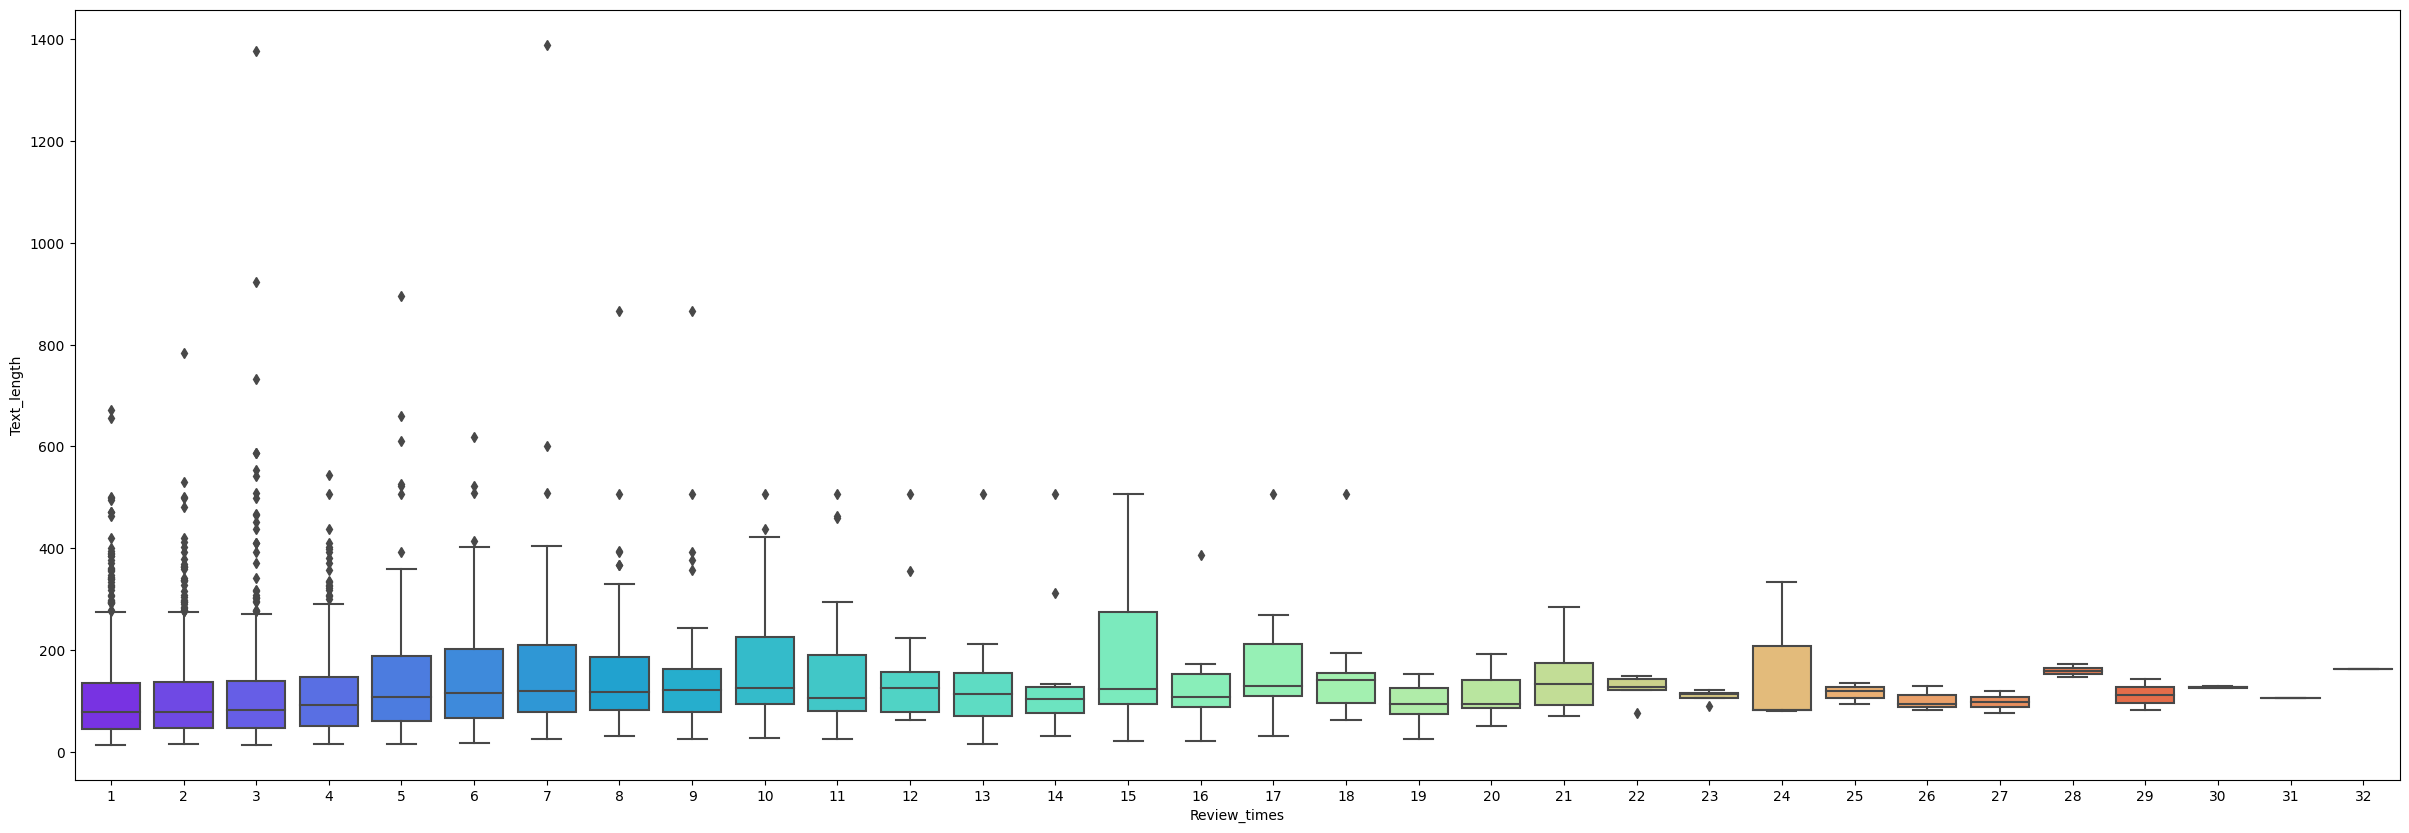

In [ ]:
plt.figure(figsize=(30,10))

sns.boxplot(y='Text_length',x='Review_times',data=top_users,palette="rainbow")
plt.show()

In [ ]:
text_length_df = top_users.groupby(top_users.Review_times)[['Text_length']].median()
text_length_df.reset_index(level=0, inplace=True)
text_length_df['Review_times'] = pd.to_numeric(text_length_df['Review_times'])
text_length_df.head()

,Review_times,Text_length
0,1,79.0
1,2,79.0
2,3,81.0
3,4,91.0
4,5,108.0


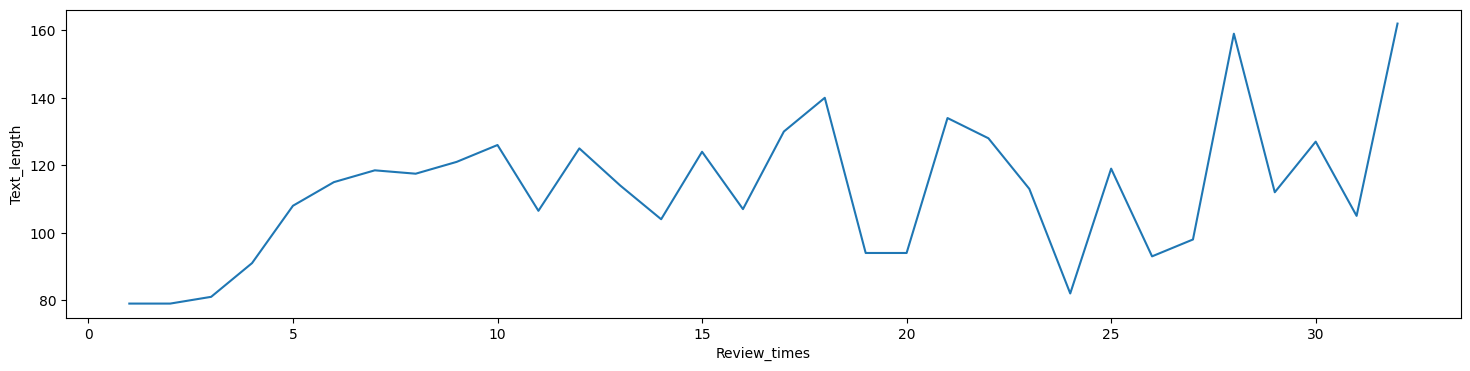

In [ ]:
plt.figure(figsize=(18,4))
sns.lineplot(y='Text_length',x='Review_times',data=text_length_df)
plt.show()

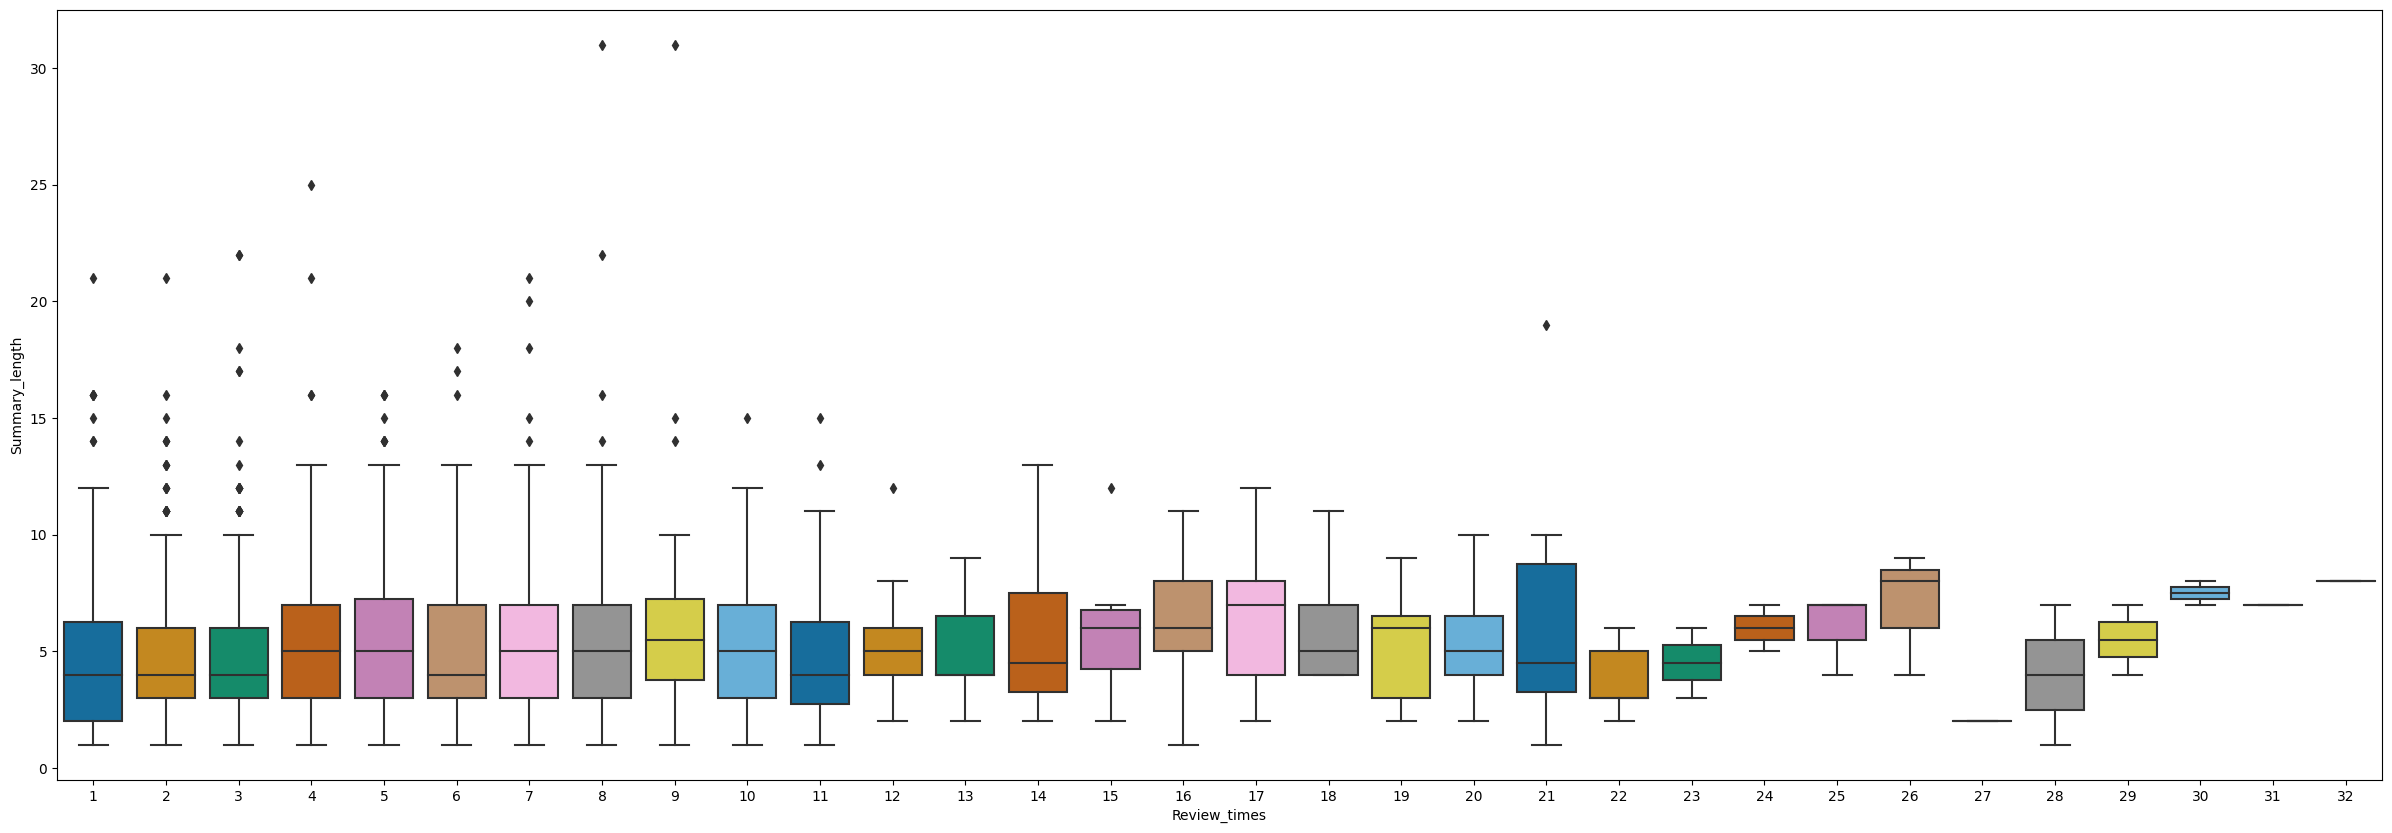

In [ ]:
plt.figure(figsize=(30,10))
sns.boxplot(y='Summary_length',x='Review_times',data=top_users,palette="colorblind")
plt.show()

In [ ]:
summary_length_df = top_users.groupby(top_users.Review_times)[['Summary_length']].median()
summary_length_df.reset_index(level=0,inplace=True)
summary_length_df['Review_times'] = pd.to_numeric(summary_length_df['Review_times'])
summary_length_df.head()

,Review_times,Summary_length
0,1,4.0
1,2,4.0
2,3,4.0
3,4,5.0
4,5,5.0


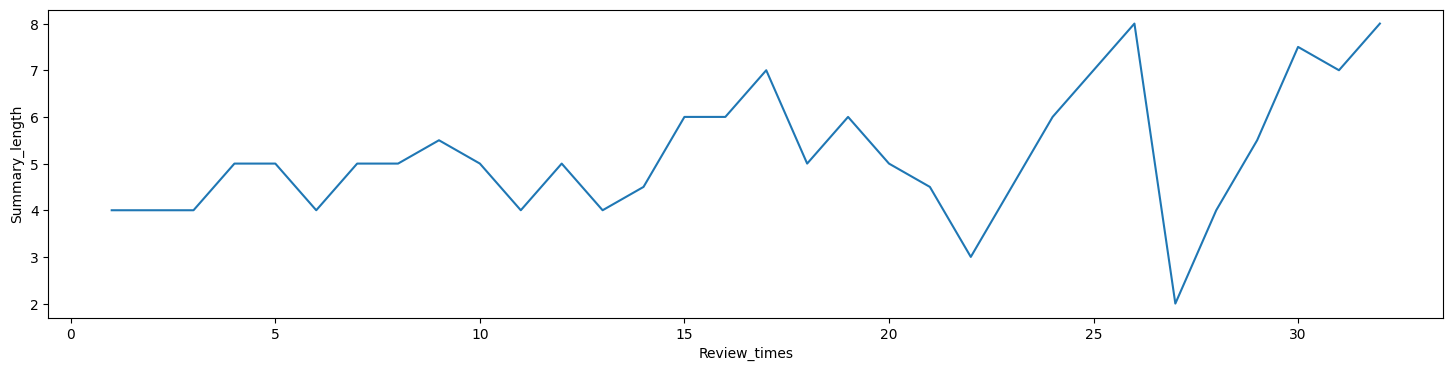

In [ ]:
plt.figure(figsize=(18,4))
sns.lineplot(y='Summary_length',x='Review_times',data=summary_length_df)
plt.show()

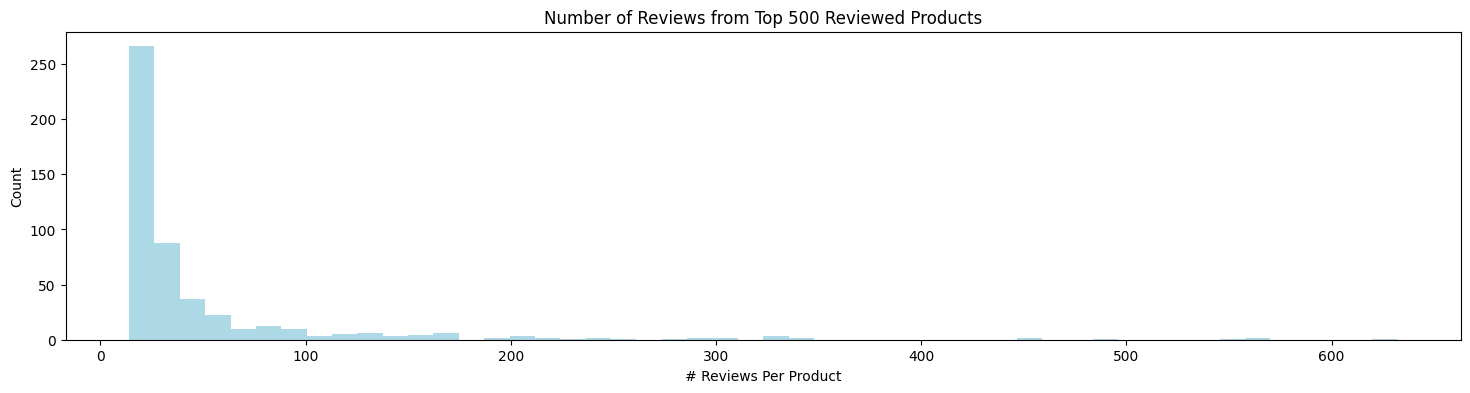

In [ ]:
top_500_product_count = reviews["ProductId"].value_counts().nlargest(500)
plt.figure(figsize=(18,4))
plt.hist(top_500_product_count,bins=50,color='lightblue')
plt.ylabel('Count')
plt.xlabel('# Reviews Per Product')
plt.title('Number of Reviews from Top 500 Reviewed Products')
plt.show()

In [ ]:
top_products = reviews.loc[reviews['ProductId'].isin(top_500_product_count.index)]
top_products_mean = top_products.groupby('ProductId').mean().filter(['Score','Helpfulness','Text_length','Summary_length'])
top_products_mean.head()

,Score,Helpfulness,Text_length,Summary_length
ProductId,,,,
B000084ETV,3.692308,0.856875,152.969231,5.169231
B00008JOL0,4.744898,0.828001,88.408163,4.142857
B0000GH6UQ,4.285714,0.591340,71.857143,3.285714
B0000T4LYC,4.736842,1.000000,45.684211,3.157895
B0000TLEEW,4.500000,0.701190,72.428571,3.285714


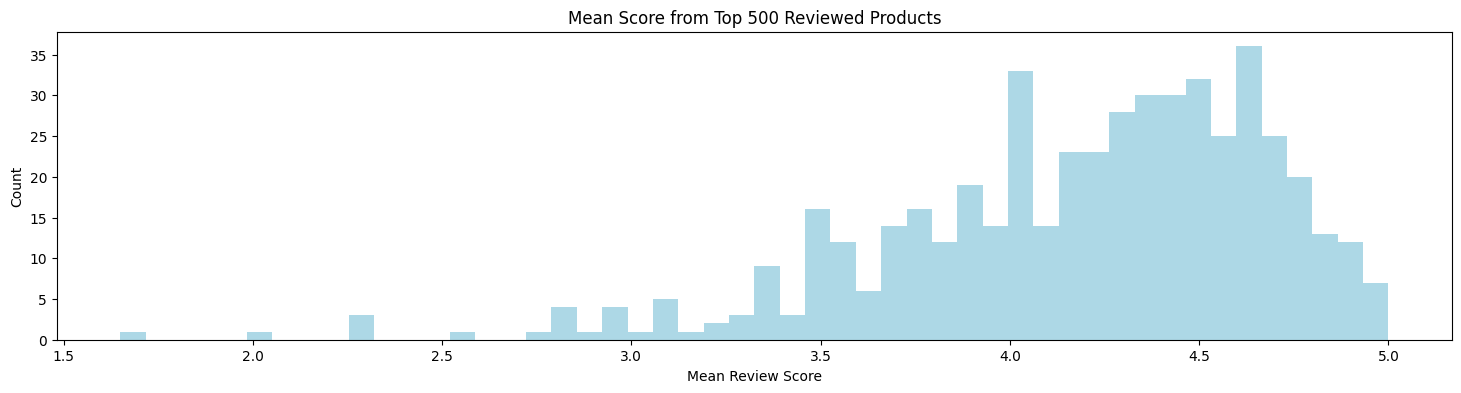

In [ ]:
plt.figure(figsize=(18,4))

plt.hist(top_products_mean["Score"],bins=50,color='lightblue')
plt.ylabel('Count')
plt.xlabel('Mean Review Score')
plt.title('Mean Score from Top 500 Reviewed Products')
plt.show()

`Observe` plot above shows histogram of Mean_Score from top_500_products 
* It looks somewhat left skewed and has a multi-modal distribution
* Average stops any product from truly being 5 stars which is expected as we would expect to see some variation in reviews

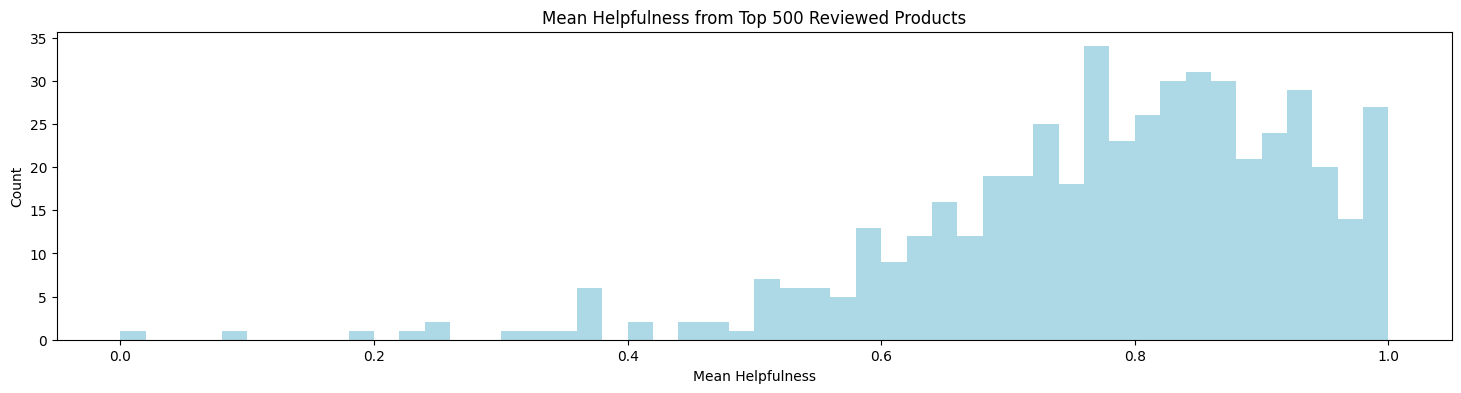

In [ ]:
plt.figure(figsize=(18,4))

plt.hist(top_products_mean["Helpfulness"],bins=50,color='lightblue')
plt.ylabel('Count')
plt.xlabel('Mean Helpfulness')
plt.title('Mean Helpfulness from Top 500 Reviewed Products')
plt.show()

In [ ]:
end_time = top_products.groupby('ProductId')['Time'].max()
top_products['Age'] = top_products.apply(lambda d:end_time[d['ProductId']] - d['Time'],axis=1) / np.timedelta64(1,'D')

<ipython-input-63-1229feb48d35>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_products['Age'] = top_products.apply(lambda d:end_time[d['ProductId']] - d['Time'],axis=1) / np.timedelta64(1,'D')


In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,verbose=0,perplexity=40,n_iter=300)
tsne_results = tsne.fit_transform(top_products[['Age','Helpfulness']].dropna())

In [ ]:
top_products.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpfulness,Summary_length,Text_length,Text_sentiment,Summary_sentiment,Age
13,14,B001GVISJM,A18ECVX2RJ7HUE,"willie ""roadie""",2,2,4,2010-11-05,fresh and greasy!,good flavor! these came securely packed... the...,1.0,3,15,Positive,Positive,685.0
14,15,B001GVISJM,A2MUGFV2TDQ47K,"Lynrie ""Oh HELL no""",4,5,5,2010-03-12,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasur...,0.8,4,22,Positive,Positive,923.0
15,16,B001GVISJM,A1CZX3CP8IKQIJ,Brian A. Lee,4,5,5,2009-12-29,"Lots of twizzlers, just what you expect.",My daughter loves twizzlers and this shipment ...,0.8,7,24,Positive,Neutral,996.0
16,17,B001GVISJM,A3KLWF6WQ5BNYO,Erica Neathery,0,0,2,2012-09-20,poor taste,I love eating them and they are good for watch...,NaN,2,42,Positive,Negative,0.0
17,18,B001GVISJM,AFKW14U97Z6QO,Becca,0,0,5,2012-08-16,Love it!,I am very satisfied with my Twizzler purchase....,NaN,2,25,Positive,Positive,35.0


In [ ]:
age_helpfulness_df = top_products.groupby([top_products.Age, top_products.Score])[['Helpfulness']].mean()
age_helpfulness_df.reset_index(level=0,inplace=True)
age_helpfulness_df.reset_index(level=0,inplace=True)
#age_helpfulness_df['Helpfulness'] = pd.to_numeric(age_helpfulness_df['Helpfulness'])
age_helpfulness_df.head()

,Score,Age,Helpfulness
0,1,0.0,0.444444
1,2,0.0,0.250000
2,3,0.0,0.700000
3,4,0.0,1.000000
4,5,0.0,0.746296


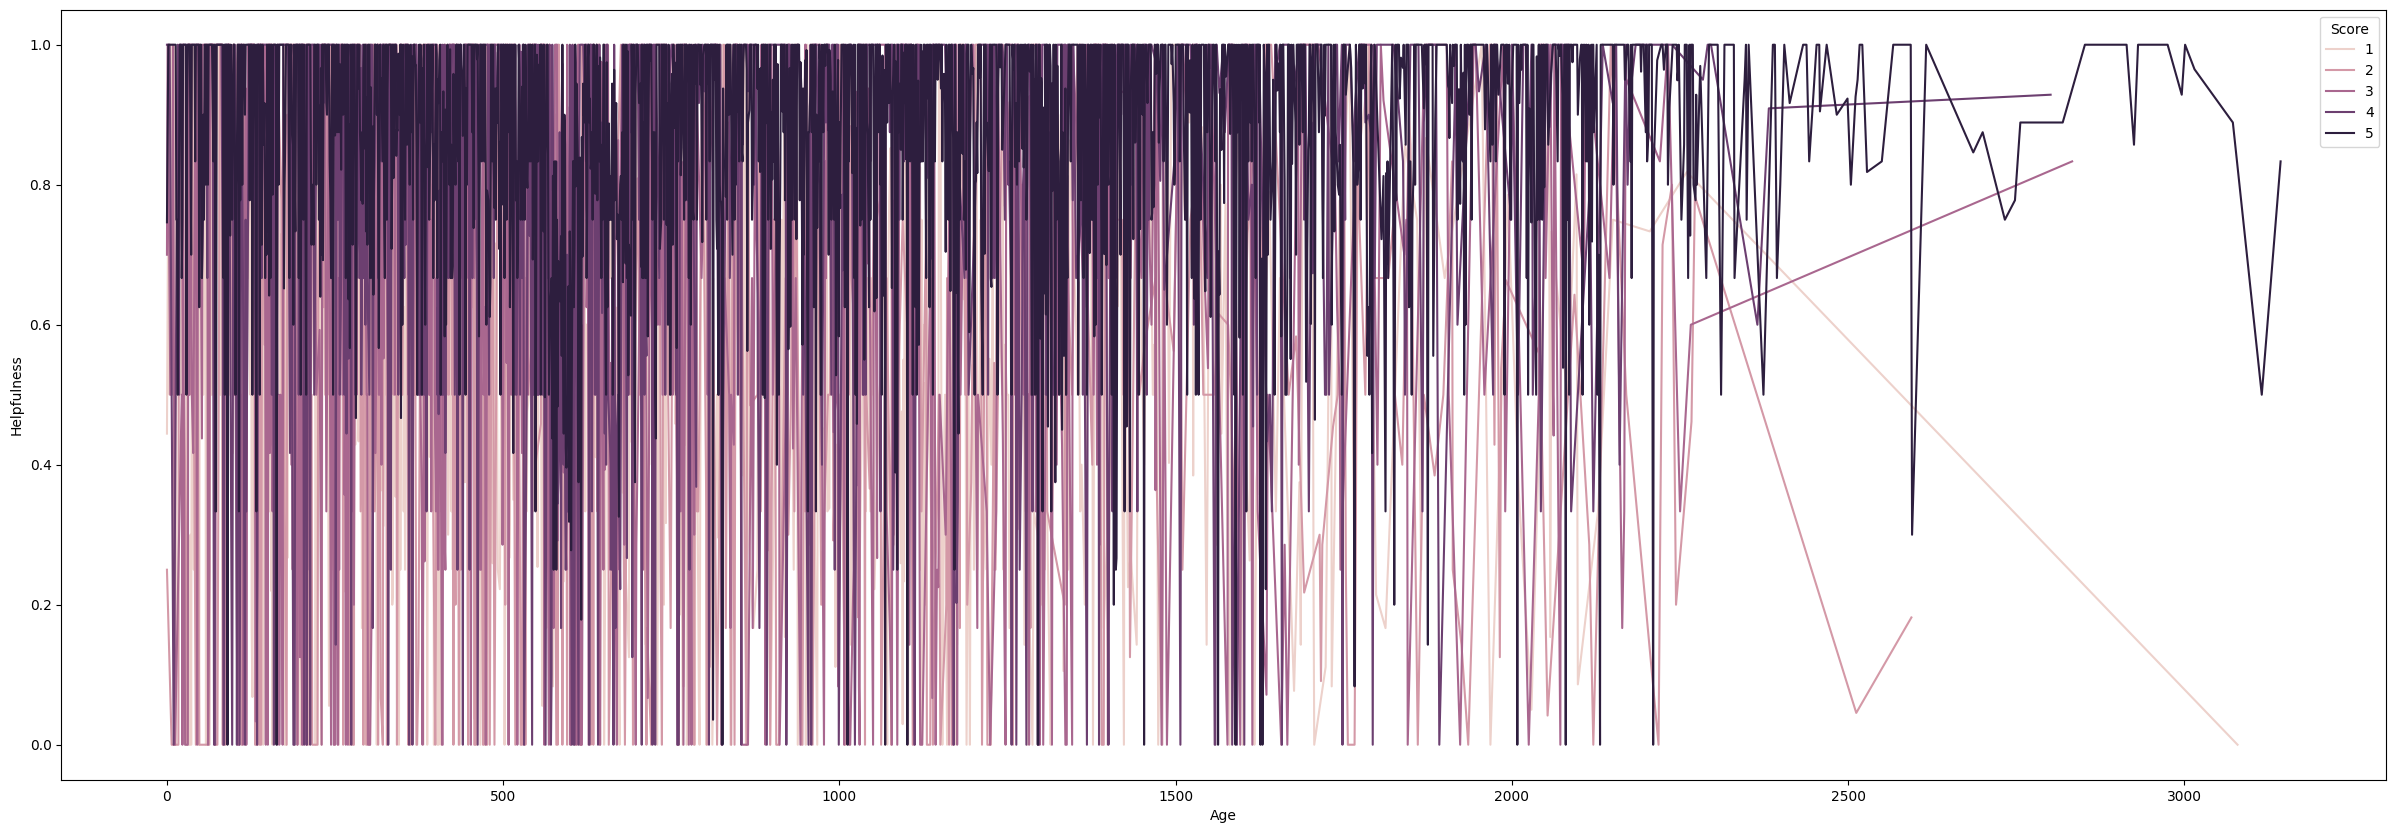

In [ ]:
plt.figure(figsize=(30,10))
sns.lineplot(y='Helpfulness',x='Age',hue='Score',data=age_helpfulness_df)
plt.show()

In [ ]:
end_time = top_products.groupby('ProductId')['Time'].max().reset_index()

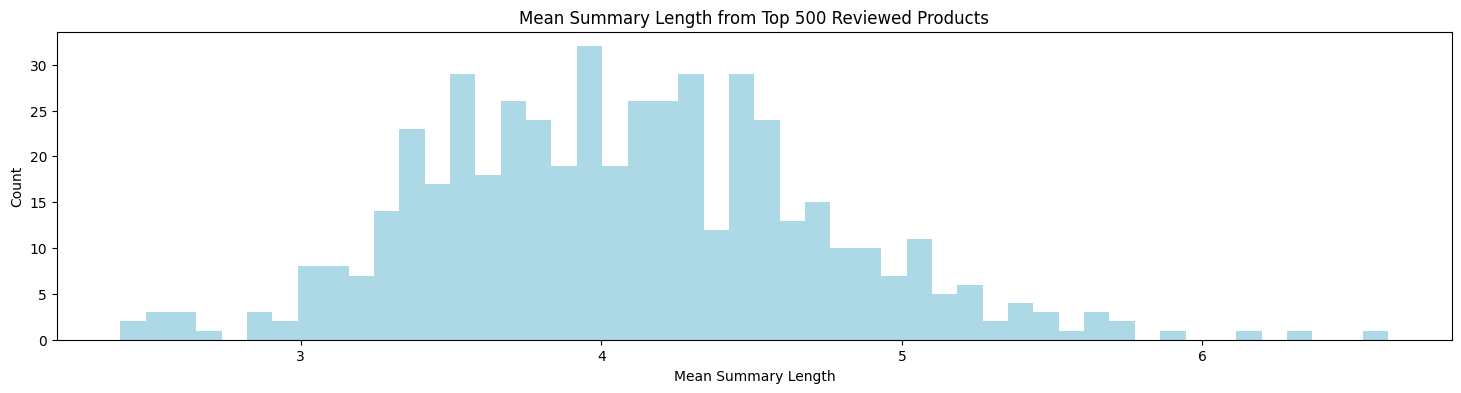

In [ ]:
plt.figure(figsize=(18,4))
plt.hist(top_products_mean['Summary_length'],bins=50,color='lightblue')
plt.ylabel('Count')
plt.xlabel('Mean Summary Length')
plt.title('Mean Summary Length from Top 500 Reviewed Products')
plt.show()

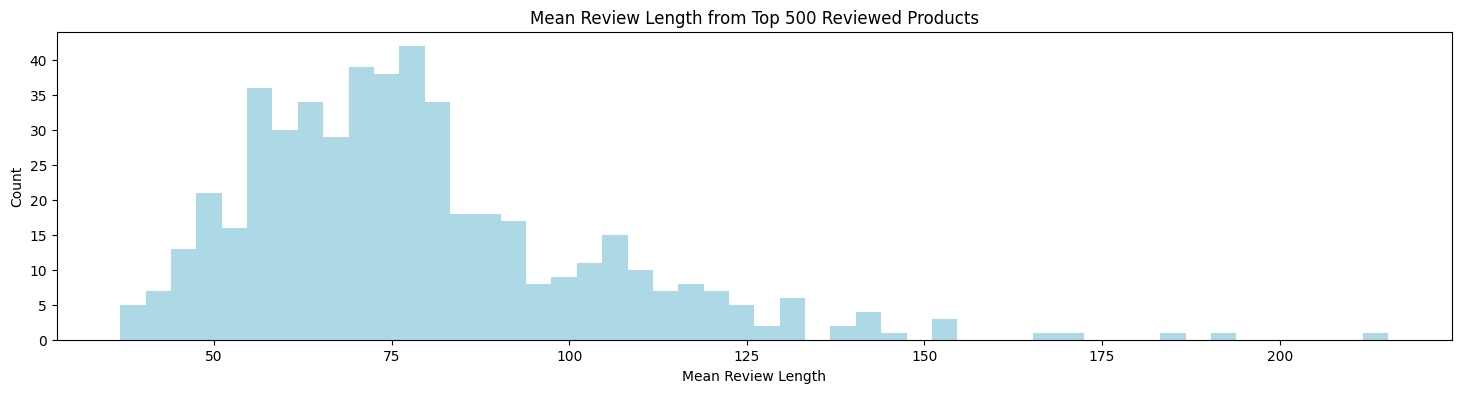

In [ ]:
plt.figure(figsize=(18,4))
plt.hist(top_products_mean['Text_length'],bins=50,color='lightblue')
plt.ylabel('Count')
plt.xlabel('Mean Review Length')
plt.title('Mean Review Length from Top 500 Reviewed Products')
plt.show()

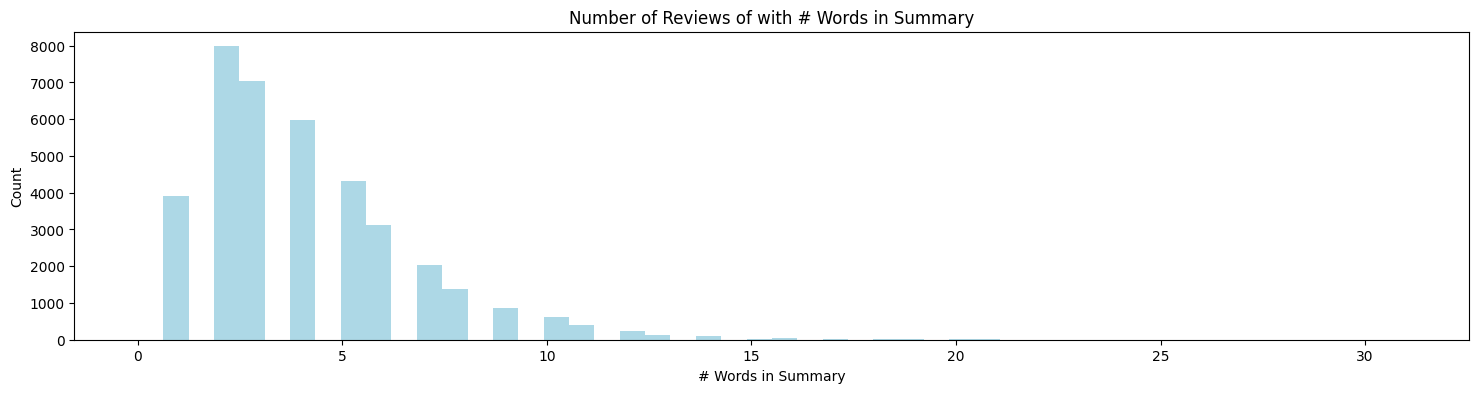

In [ ]:
plt.figure(figsize=(18,4))
plt.hist(reviews['Summary_length'],bins=50,color='lightblue')
plt.ylabel('Count')
plt.xlabel('# Words in Summary')
plt.title('Number of Reviews of with # Words in Summary')
plt.show()

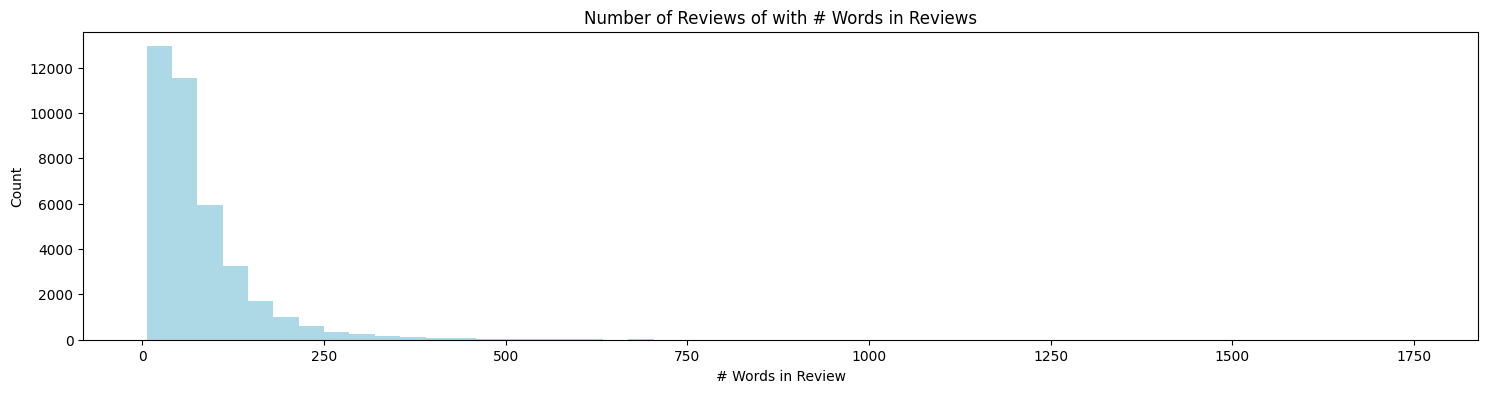

In [ ]:
plt.figure(figsize=(18,4))
plt.hist(reviews['Text_length'],bins=50,color='lightblue')
plt.ylabel('Count')
plt.xlabel('# Words in Review')
plt.title('Number of Reviews of with # Words in Reviews')
plt.show()

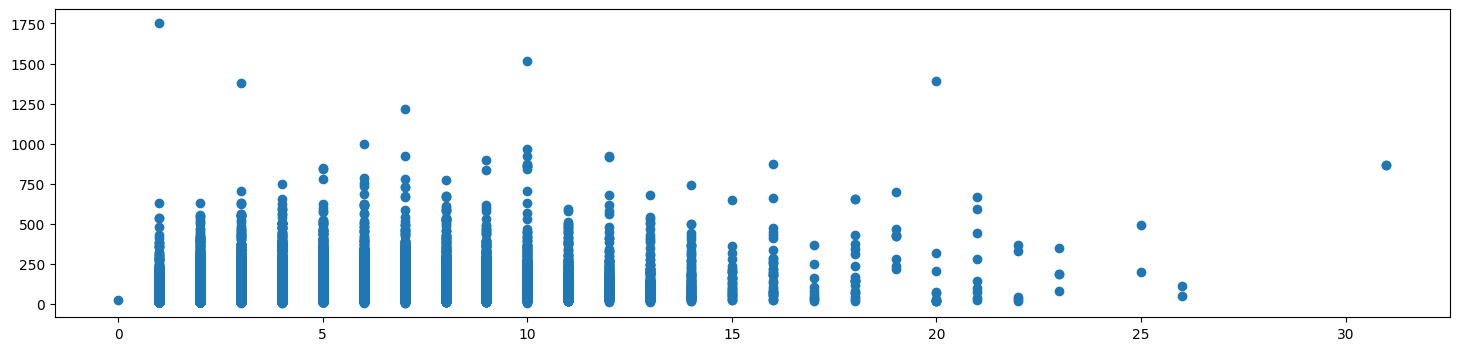

In [ ]:
plt.figure(figsize=(18,4))
plt.scatter(reviews["Summary_length"], reviews["Text_length"])
plt.show()

In [ ]:
# calculating spearman's correlation
coef, p = spearmanr(reviews['Summary_length'], reviews['Text_length'])
print('Spearmans correlation coefficient: %.3f' % coef)
# interpreting significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.311
Samples are correlated (reject H0) p=0.000


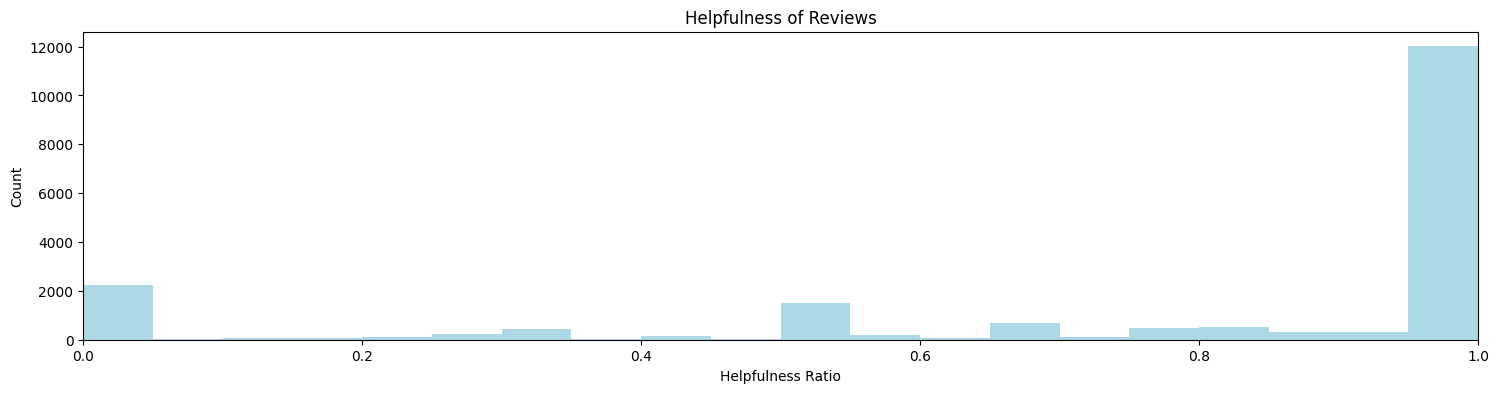

In [ ]:
plt.figure(figsize=(18,4))

plt.hist(reviews['Helpfulness'],bins=20,color='lightblue')
plt.ylabel('Count')
plt.xlabel('Helpfulness Ratio')
plt.title('Helpfulness of Reviews')
plt.xlim(0,1)
plt.show()

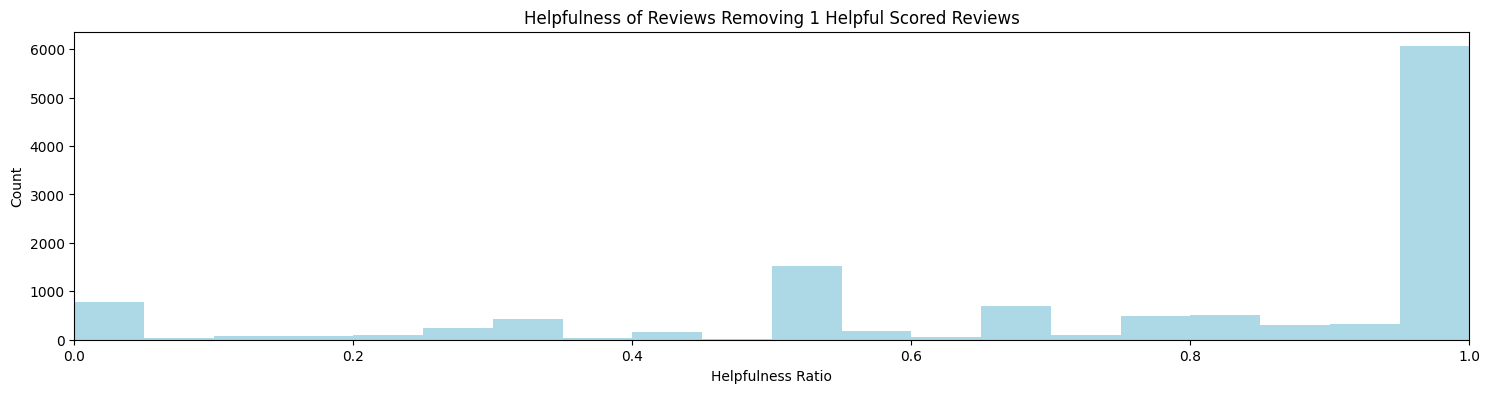

In [ ]:
plt.figure(figsize=(18,4))

plt.hist(reviews[reviews['HelpfulnessDenominator'] != 1]['Helpfulness'].dropna(), bins=20, color='lightblue')
plt.ylabel('Count')
plt.xlabel('Helpfulness Ratio')
plt.title('Helpfulness of Reviews Removing 1 Helpful Scored Reviews')
plt.xlim(0,1)
plt.show()

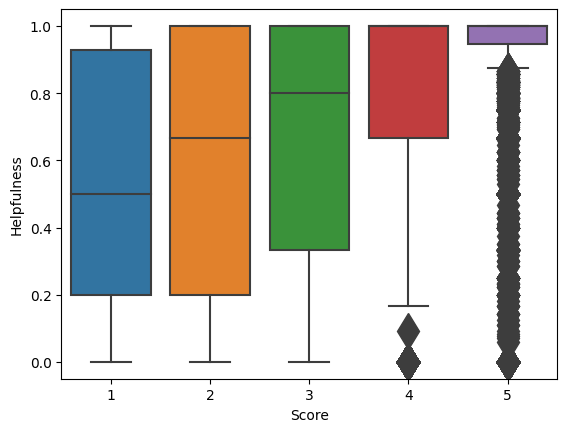

In [ ]:
sns.boxplot(x='Score',y='Helpfulness',data=reviews,fliersize=18)
plt.show()

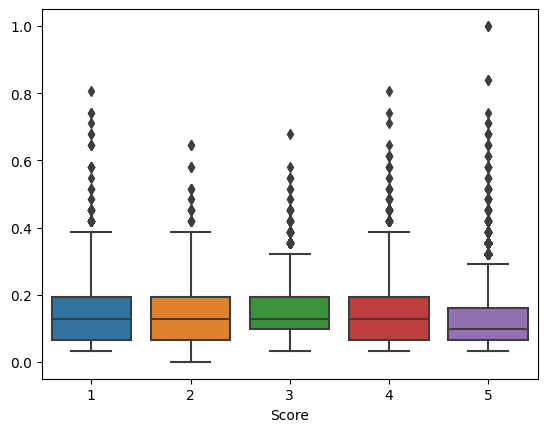

In [ ]:
from sklearn.preprocessing import minmax_scale

sns.boxplot(x=reviews['Score'],y=minmax_scale(reviews['Summary_length']))
plt.show()

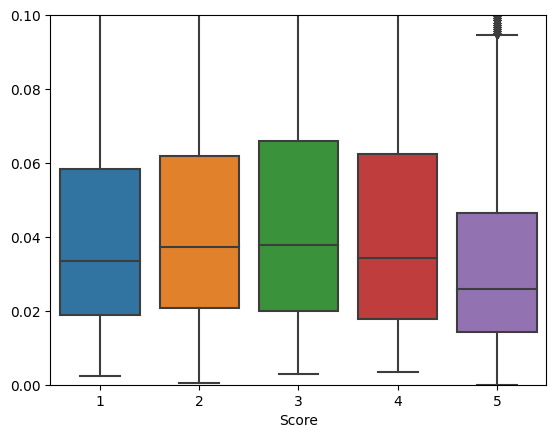

In [ ]:
sns.boxplot(x=reviews['Score'], y=minmax_scale(reviews['Text_length'])).set(ylim=(0, 0.1))
plt.show()

In [ ]:
reviews_sampled = reviews.sample(12500,random_state=108) 

In [ ]:
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer


nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
def simple_tokenizer(corpus,nlp=nlp):
    doc = nlp(corpus)
    return [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.is_alpha]

In [ ]:
#from sklearn.pipeline import Pipeline
#tfidf_pipe = Pipeline([('tfidf', TfidfVectorizer(tokenizer = simple_tokenizer))])
#tfidf_pipe.fit_transform(reviews['Summary'][0:10], reviews['Text'][0:10])

In [ ]:
print('Starting Summary TF-IDF')
tfidf_s = TfidfVectorizer(tokenizer = simple_tokenizer)
tfidf_summary = tfidf_s.fit_transform(reviews_sampled['Summary'])
print('Starting Review TF-IDF')
tfidf_r = TfidfVectorizer(tokenizer = simple_tokenizer)
tfidf_reviews = tfidf_r.fit_transform(reviews_sampled['Text'])

Starting Summary TF-IDF


/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Starting Review TF-IDF


In [ ]:
features_name = tfidf_r.get_feature_names_out()
#print(features_name)

In [ ]:
indices = np.argsort(tfidf_s.idf_)[::-1]
features = tfidf_s.get_feature_names_out()

top_n = 40
top_features = [features[i] for i in indices[:top_n]]
print(top_features)

['lick', 'indigestable', 'ink', 'initially', 'ingre', 'inferior', 'industrial', 'indulging', 'indulgence', 'individually', 'indispensible', 'indestructible', 'ittt', 'indescribably', 'inconsistant', 'incomplete', 'include', 'inaccurate', 'important', 'imo', 'immediately', 'imho', 'innocent', 'inorganic', 'instantly', 'institution', 'itch', 'ist', 'issimo', 'israelis', 'ish', 'iron', 'irish', 'ireland', 'iraq', 'iodine', 'introduction', 'intriguing', 'intolerant', 'internet']


In [ ]:
# top 40 tf idf features for reviews
indices = np.argsort(tfidf_r.idf_)[::-1]
features = tfidf_r.get_feature_names_out()

top_n = 40
top_features = [features[i] for i in indices[:top_n]]
print(top_features)

['ricotta', 'poopy', 'ponder', 'fell', 'feisty', 'poochie', 'feist', 'poof', 'pooh', 'feels', 'feeds', 'pooped', 'poopie', 'poopin', 'feat', 'pompeian', 'feasible', 'popadom', 'fcc', 'popchips', 'fbook', 'fbk', 'fax', 'favs', 'popin', 'poplite', 'popover', 'favorirte', 'poncho', 'fellix', 'esspecially', 'politically', 'polan', 'poland', 'feta', 'fet', 'festive', 'police', 'fervently', 'fertalize']


**`First, Imputing Score to be Binary_Classifcation using scores of 4-5 as High and everything else as Low`**

In [ ]:
reviews['Score_bc'] = reviews['Score'] >= 4
reviews['Score_bc'] = reviews['Score_bc'].astype('category')
reviews.replace({'Score_bc':{True:'High',False:'Low'}},inplace=True)
reviews['Score_bc'].head()

0    High
1     Low
2    High
3     Low
4    High
Name: Score_bc, dtype: category
Categories (2, object): ['Low', 'High']

**`Next, Setup Scattertext plots of every year of this corpus to get a sense of how things changed over time`**
* To again see which years we have in dataset, following can be done:

In [ ]:
pd.DatetimeIndex(reviews['Time']).year.value_counts()

2012    12091
2011    11333
2010     6096
2009     4358
2008     2338
2007     1403
2006      407
2005       99
2004       43
2003        5
2000        2
Name: Time, dtype: int64

In [ ]:
pip install scattertext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 92.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9308 sha256=fd5d86008e8e87c1ca0a755fbdc094cc26b9b36e4ad5936ff08f4b55c0cf6547
  Stored in directory: /root/.cache/pip/wheels/65/3c/c7/44672c5062c16d05760b1eaddbf611d2f6a4b715c6d6777418
Successfully built flashtext


In [ ]:
#!pip install scattertext
import scattertext as st

In [ ]:
nlp = spacy.load('en_core_web_sm')
def produce_scattertext(nlp=nlp,year,col='Text'):

    filtered_reviews = reviews[pd.DatetimeIndex(reviews['Time']).year == year]
    print("Creating corpus for " + str(year))
    corpus = st.CorpusFromPandas(filtered_reviews,category_col='Score_bc',text_col=col,nlp=nlp).build()
    print("Creating plot")
    html = st.produce_scattertext_explorer(corpus,category='High',category_name='High Score',
                                           not_category_name='Low Score',width_in_pixels=1000,metadata=filtered_reviews["Score"])
    open("/" + str(year) + ".html", 'wb').write(html.encode('utf-8'))
    
    print("Finished Scattertext")
    

In [ ]:
# creating plots (1999 all positive)
#produce_scattertext(year = 2000)
#produce_scattertext(year = 2001)
#produce_scattertext(year = 2002)
produce_scattertext(year = 2003)
produce_scattertext(year = 2004)
produce_scattertext(year = 2005)
produce_scattertext(year = 2006)
produce_scattertext(year = 2007)
produce_scattertext(year = 2008)
produce_scattertext(year = 2009)
produce_scattertext(year = 2010)
produce_scattertext(year = 2011)
produce_scattertext(year = 2012)

Creating corpus for 2003
Creating plot


FileNotFoundError: ignored